<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>Credit Risk Analysis </strong></span></b> </div> 

<img src="money_new.jpg" alt="Description of the image">


### Table of Contents :
* [Business Understanding](#business)
* [Business Objectives :](#Business-Objectives)
* [Data Understanding :](#IData-Understanding)
* [Data Cleaning and Preprocessing :](#Cleaning-Data)
* [Data Exploration :](#Data-Exploration)
    1. [Univariate Visualization](#Univariate-Visualization) 
    2. [Bivariate Visualization ](#Bivariate-Visualization)
    3. [Data Analysis Observations :](#Data-Analysis-Observations)
* [Modelling Pipeline :](#Modelling(Pipeline))
    1. [Count encoding:](#Downsampling-Techniques)
    2. [Oversampling Techniques :](#Oversampling-Techniques)
    3. [Standardization:](#Combined-Techniques)
    4. [Feature Selection:]()
    
* [Feature Importance :](#Visualizing-important-features)
* [Conclusion :](#Conclusion)

### <b>I <span style='color:#16C2D5'>|</span> Data Understanding</b> 

The banking and Microfinance industry offer loans to clients after the terms and conditions for loans have been accepted, signed and filed by the loanee. Every financial institution caps loans at different interest rates with high interests often related to defaulting. Central banks act as the regulatory bodies in the banking industry and have been very instrumental in ensuring interest charges are not capped beyond certain rates. 


To qualify for loans, one has to have a good credit history. Repayment always has to be on time to ensure the growth of loan limits. Many businesses have been started through loans and many also operate using loans. Loans should also be solely taken for business purposes and unavoidable emergencies and not for leisure. That being said, a good sound financial literacy is therefore needed to ensure no defaulting. 

### <b>II <span style='color:#16C2D5'>|</span> Business Objectives</b> 


Faced with the challenge of clients defaulting, often due to poor financial decisions, microfinance institutions aim to proactively manage credit risk. To achieve this, we seek:
* To develop a robust Machine Learning model capable of predicting the likelihood of a client defaulting. This model will empower microfinance institutions to make informed lending decisions and mitigate the high default rates. This will in turn foster a more sustainable financial ecosystem.
* To find the states and cities with high default and income distribution rates.
* To find the **Area Under Curve** and threshold value that optimizes the **TRUE POSITIVE RATE** and also minimizes the false negative rate.
* To explore the impact of Job and house tenure on Default Rates. Investigate whether the duration of employment and housing directly influences the likelihood of default.

### <b>III <span style='color:#16C2D5'>|</span> Import libraries</b>

In [164]:
#Data manipulation libraries
import pandas as pd  
import numpy as np  

# Visualization libraries
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns  

# Modelling libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, auc 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier  
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer 
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2

from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier 


#Class imbalance library
from imblearn.over_sampling import SMOTE, SMOTEN, RandomOverSampler
from imblearn.pipeline import make_pipeline

from category_encoders import CountEncoder 
import category_encoders as ce 
from feature_engine.encoding import CountFrequencyEncoder

from scipy.stats import randint, uniform

import pickle

In [2]:
original_df = pd.read_csv("Training Data.csv")
original_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Data Understanding</span></b> </div>


In [3]:
#Check data information
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
# Check for missing values
original_df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
original_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

The data does not seem to have any null values. 

Six columns are of the object data type namely: **`Married/Single`**,  **`House_Ownership`**,  **`Car_Ownership`**,  **`Profession`**, **`CITY`** and **`STATE`**. We then check for duplicated values.

In [6]:
#Check for duplicate values
original_df.duplicated().sum()

0

In [7]:
#Column value counts with their percentage distribution.
for column in original_df.columns:
    print(f"Column: {column}")
    print(original_df[column].value_counts())
    print("=======================")
    print(original_df[column].value_counts(normalize=True)*100)
    print("======================")

Column: Id
1         1
167991    1
167993    1
167994    1
167995    1
         ..
84005     1
84006     1
84007     1
84008     1
252000    1
Name: Id, Length: 252000, dtype: int64
1         0.000397
167991    0.000397
167993    0.000397
167994    0.000397
167995    0.000397
            ...   
84005     0.000397
84006     0.000397
84007     0.000397
84008     0.000397
252000    0.000397
Name: Id, Length: 252000, dtype: float64
Column: Income


7936020    77
9775375    71
1996629    71
9345456    70
1886371    40
           ..
8927336     1
5656901     1
8171741     1
3164826     1
9070230     1
Name: Income, Length: 41920, dtype: int64
7936020    0.030556
9775375    0.028175
1996629    0.028175
9345456    0.027778
1886371    0.015873
             ...   
8927336    0.000397
5656901    0.000397
8171741    0.000397
3164826    0.000397
9070230    0.000397
Name: Income, Length: 41920, dtype: float64
Column: Age
27    5197
66    5092
48    4967
33    4921
41    4827
45    4806
54    4785
68    4772
35    4643
50    4624
69    4617
76    4585
55    4563
25    4543
72    4533
79    4505
60    4504
59    4498
53    4490
47    4483
30    4468
78    4455
22    4430
34    4414
57    4394
58    4368
56    4344
24    4326
23    4322
62    4311
31    4257
70    4251
61    4235
40    4233
43    4206
21    4205
49    4203
26    4156
37    4153
71    4150
42    4134
64    4132
29    4109
67    3995
65    3969
74    3954
63    3942
77    3916


The **Uttar_Pradesh** state seems to be the most populated column followed closely by **Maharashtra** and **Andhra_Pradesh**. There also seems to be an even distribution of various proffessions. A higher percentage of people do not own cars. **92%** of the people rent houses with only **5%** owning homes. About **88%** of peaople did not default and about **12%** of people defaulted. 

Check the summary statistics of the numeric columns in the dataframe.

In [8]:
original_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


The **income** column is in a different scale. It has a maximum value of **9999938** and minimum value of **10310**. Compairing this to other columns, the **income** column will definitely need a different scaling to the other columns. 

In [9]:
# Drop the id column

original_df = original_df.drop(columns='Id', axis=1)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Data Cleaning and preparation</span></b> </div>


To clean the data, we create a separate copy of the original dataframe. This is so because all the data cleaning will be done using a pipeline to ensure no Data leakage during the pre-processing stage. 

The data does not have any missing values therefore no need for imputation. Data cleaning in this context will only consist of only encoding the categorical variables. The **CITY** and **STATE** columns however have very high value counts.They have very high cardinality. Using **One Hot Encoding** will make our dataset very large.  It is for this reason that we will apply encoding using the frequencies of the city and state frequencies.

In [10]:
eda_df = original_df.copy()
eda_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [11]:

for cols in eda_df.columns:
    if eda_df[cols].dtype == "object":
        print(eda_df[cols].value_counts())
    

single     226272
married     25728
Name: Married/Single, dtype: int64
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64
no     176000
yes     76000
Name: Car_Ownership, dtype: int64
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer         

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3. Explorative Data Analysis</span></b> </div>

### <b>3.1 <span style='color:#16C2D5'>|</span> Univariate analysis</b> 

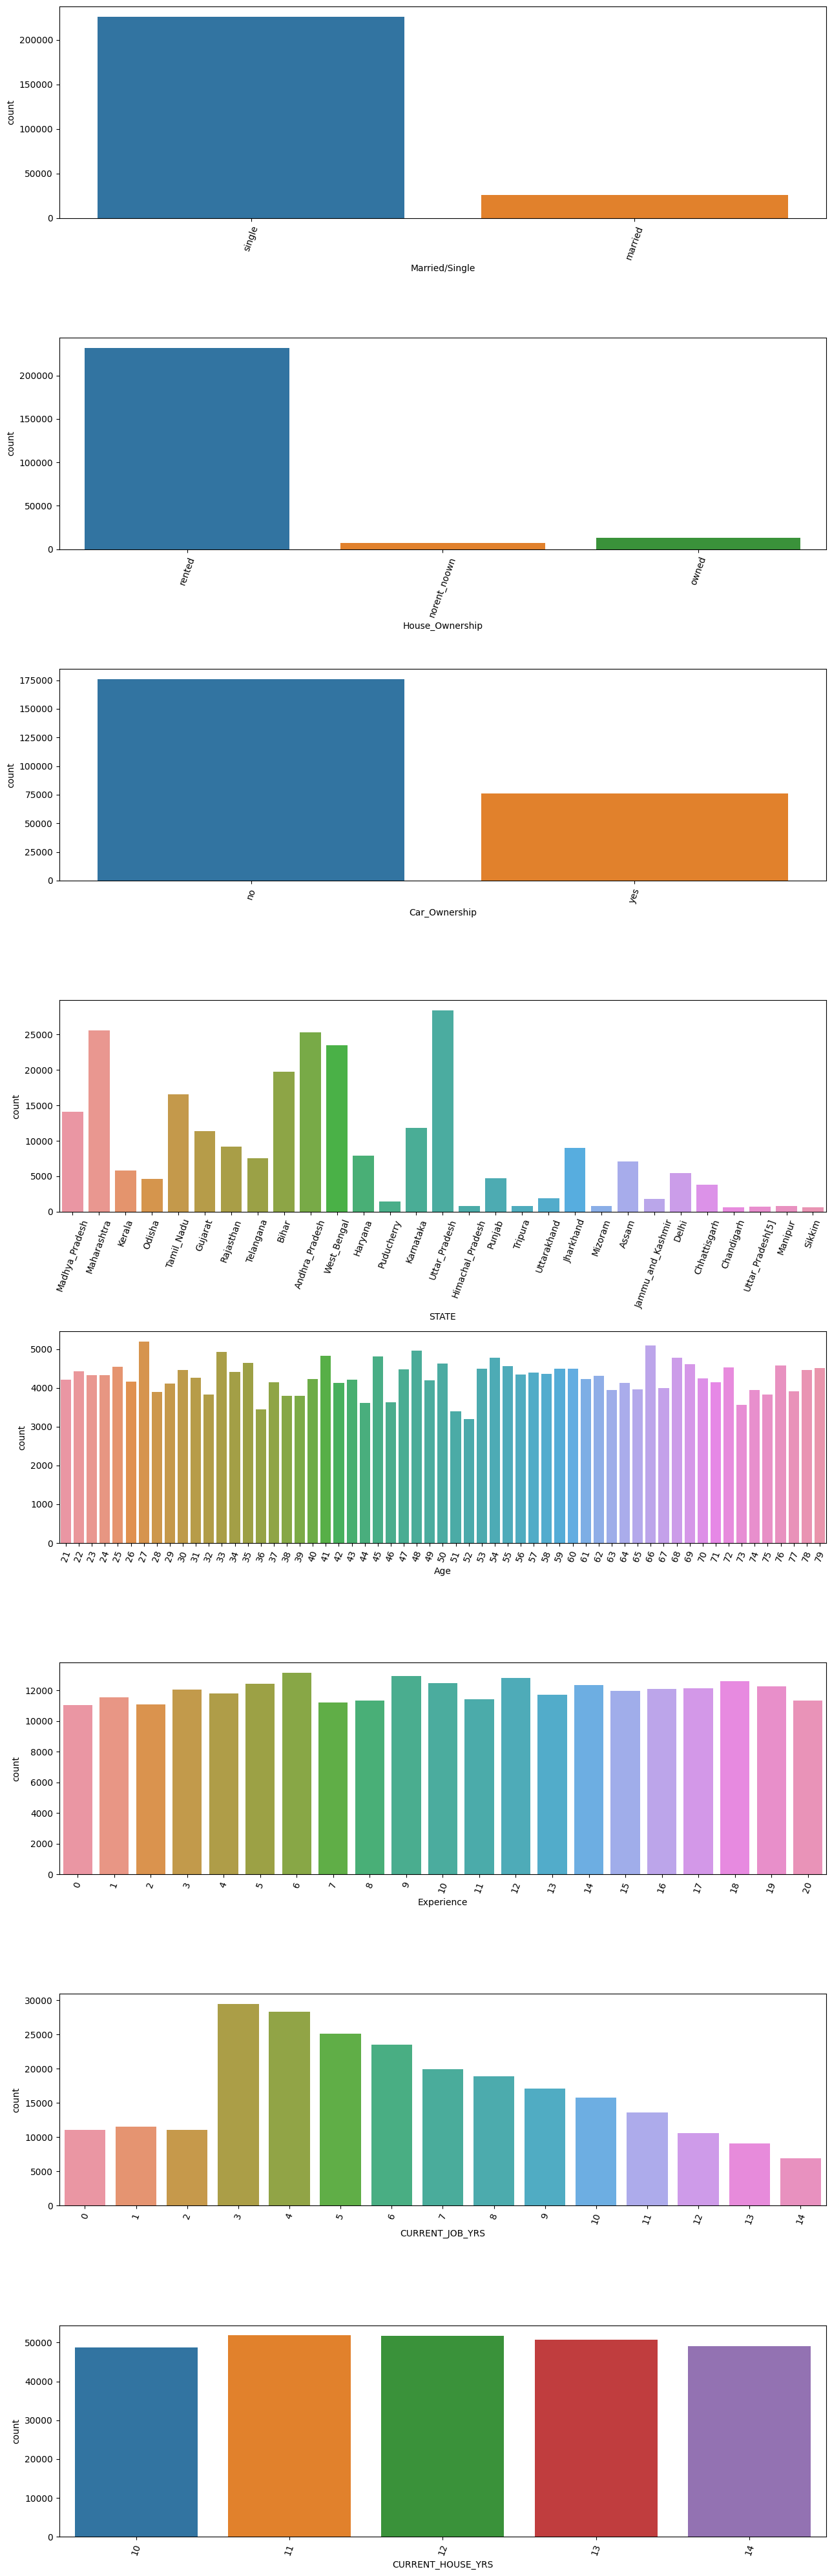

In [12]:
# various countplots
plt.figure(figsize=(13,40))

cat_cols = ['Married/Single','House_Ownership','Car_Ownership','STATE', 'Age', 'Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
for i, cols in enumerate(cat_cols):
    plt.subplot(8, 1, i+1)
    sns.countplot(data=eda_df, x=cols)
    plt.xticks(rotation=70)
    plt.title(f'Countplot for {cols} ')
        

plt.tight_layout()
plt.show()

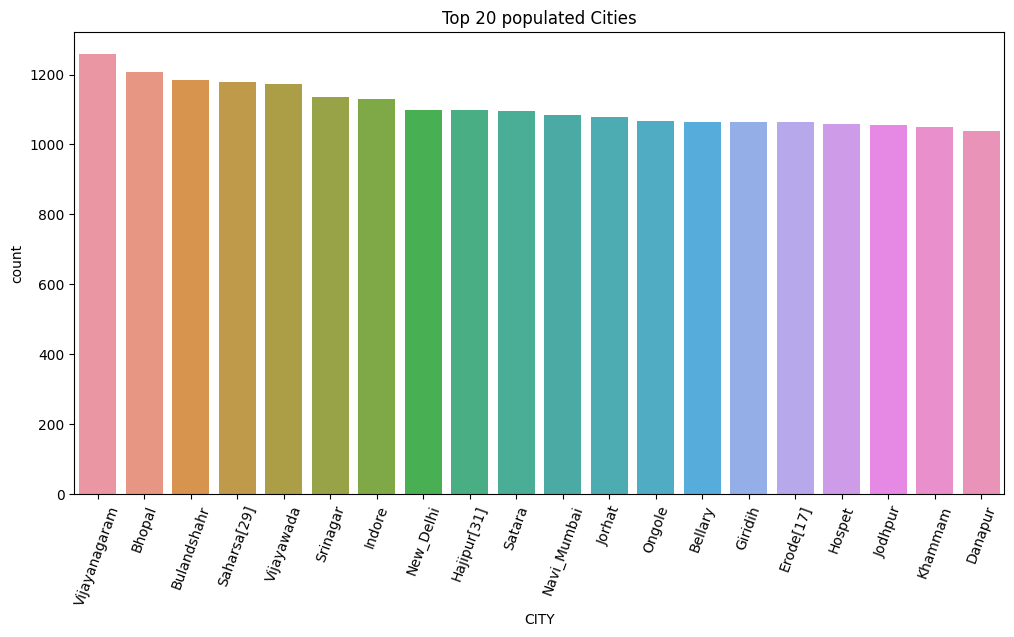

In [13]:
plt.figure(figsize=(12, 6))
city = eda_df['CITY'].value_counts(ascending=False)
top_20_cities = city.head(20)
sns.countplot(data=eda_df, x='CITY', order=top_20_cities.index)
plt.title("Top 20 populated Cities")
plt.xticks(rotation = 70)
plt.show()

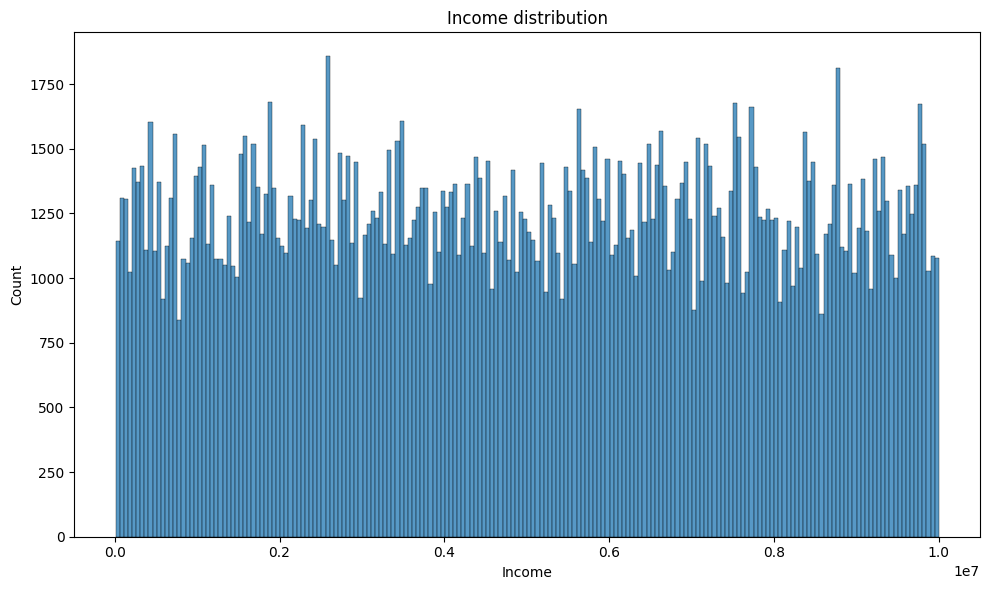

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=eda_df, x="Income", bins=200)
plt.title("Income distribution")
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Income', ylabel='Density'>

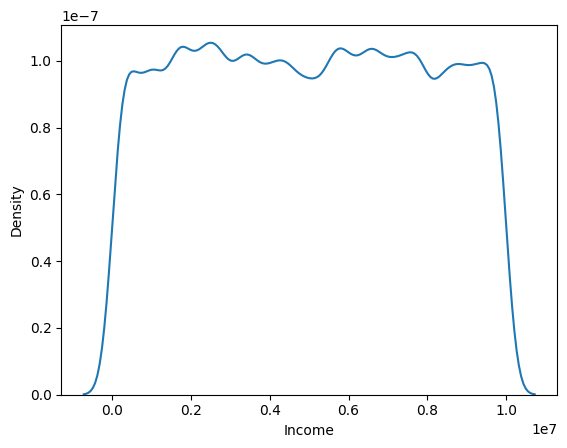

In [15]:
sns.kdeplot(eda_df.Income)

### <b>3.2 <span style='color:#16C2D5'>|</span> Bivariate analysis</b>

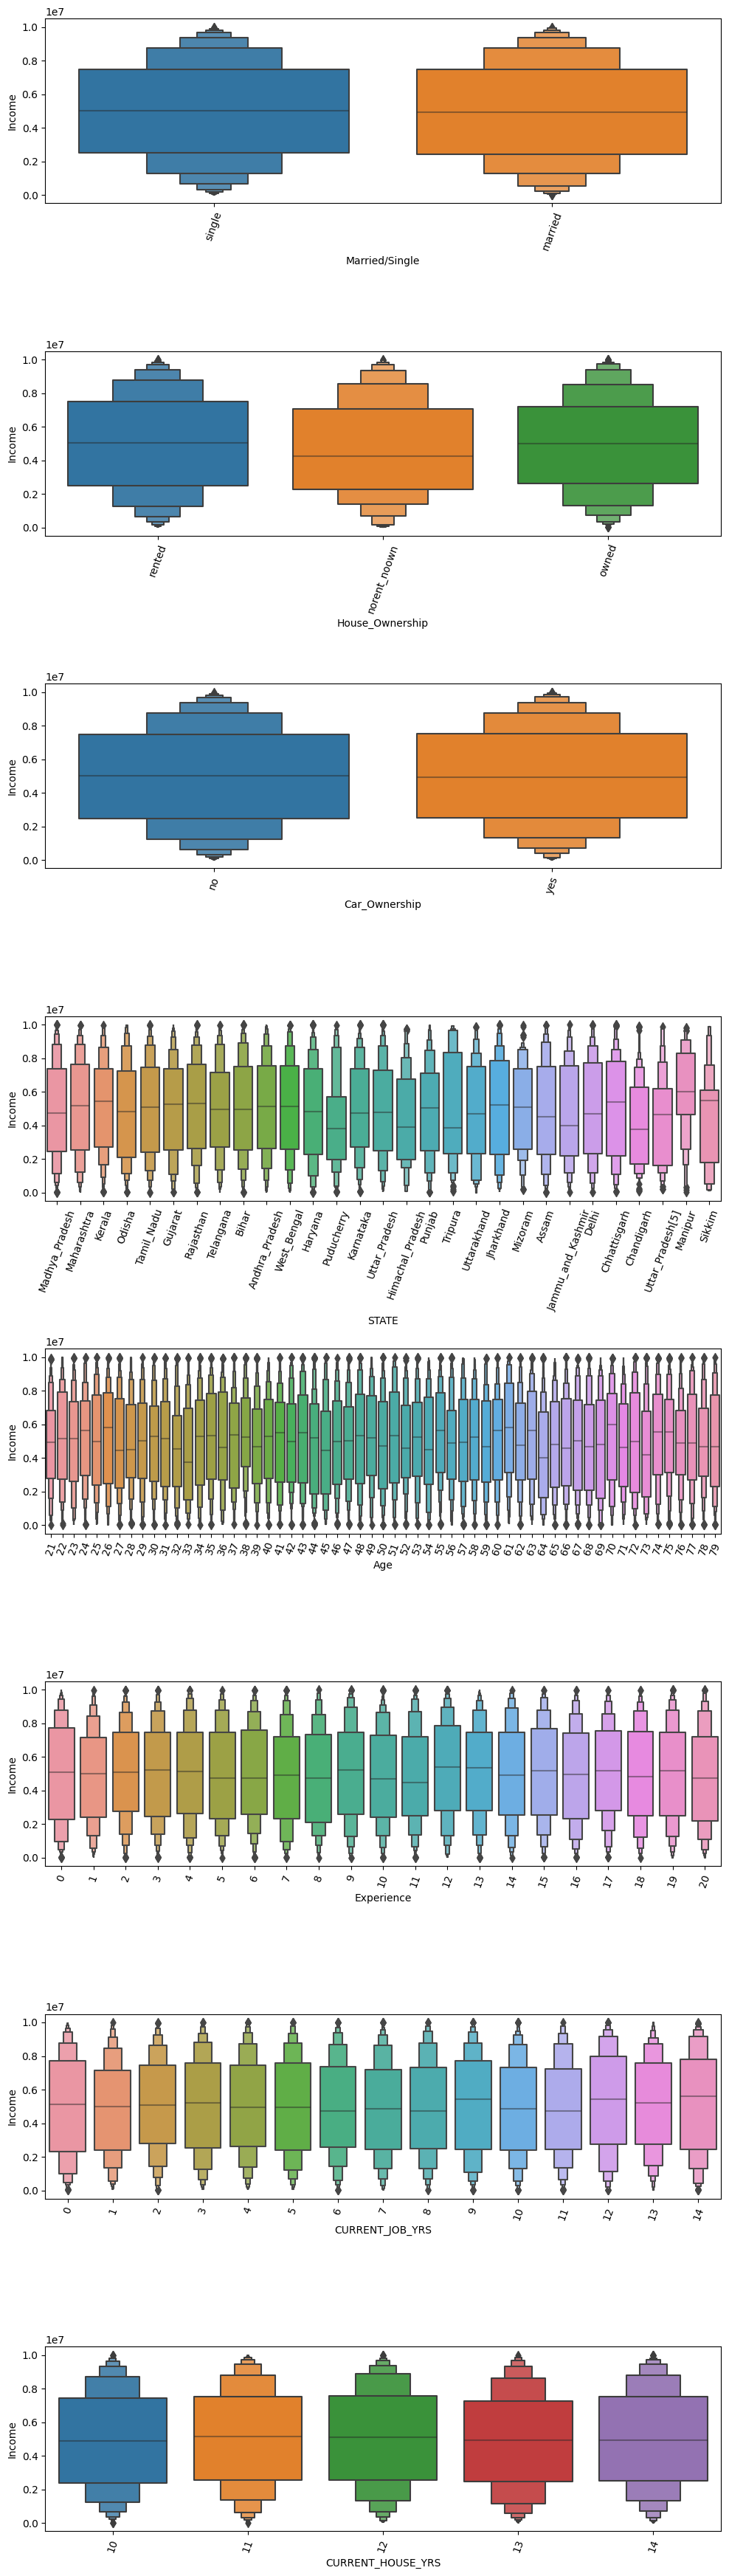

In [16]:
# Income distribution
plt.figure(figsize=(10, 35))

for i, cols in enumerate(cat_cols):
    plt.subplot(8, 1, i+1)
    sns.boxenplot(data=eda_df, x=cols, y='Income')
    plt.xticks(rotation=70)
    plt.title(f'Boxentplots for {cols} with respect to Income')
        

plt.tight_layout()
plt.show()

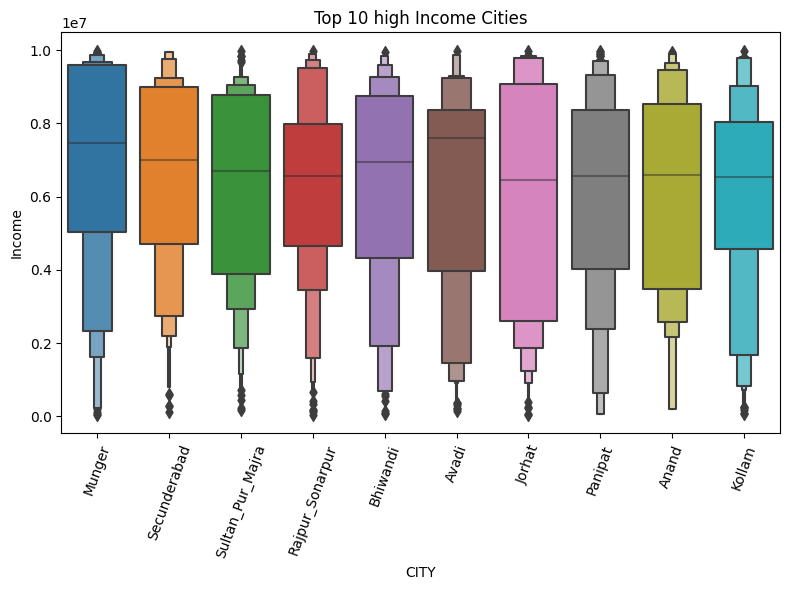

In [17]:
plt.figure(figsize=(8,6))

average_income_by_city = eda_df.groupby('CITY')['Income'].mean()

top_10_high_income_cities = average_income_by_city.sort_values(ascending=False).head(10).index

top_10_cities_df = eda_df[eda_df['CITY'].isin(top_10_high_income_cities)]

sns.boxenplot(data=top_10_cities_df, x='CITY', y='Income', order=top_10_high_income_cities)

plt.title("Top 10 high Income Cities")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

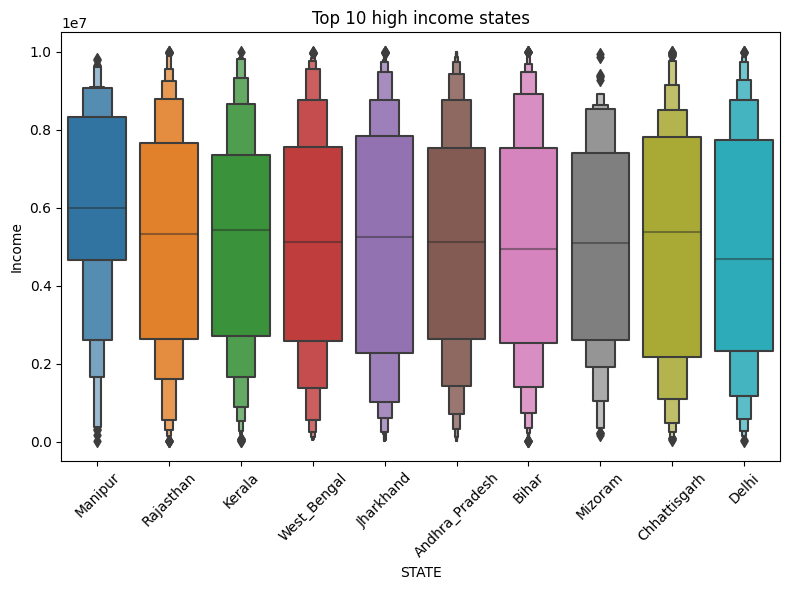

In [18]:
plt.figure(figsize=(8,6))
average_income_by_state = eda_df.groupby('STATE')['Income'].mean()

top_10_high_income_states = average_income_by_state.sort_values(ascending=False).head(10).index

top_10_states_df = eda_df[eda_df['STATE'].isin(top_10_high_income_states)]

sns.boxenplot(data=top_10_states_df, x='STATE', y='Income', order=top_10_high_income_states)
plt.title("Top 10 high income states")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


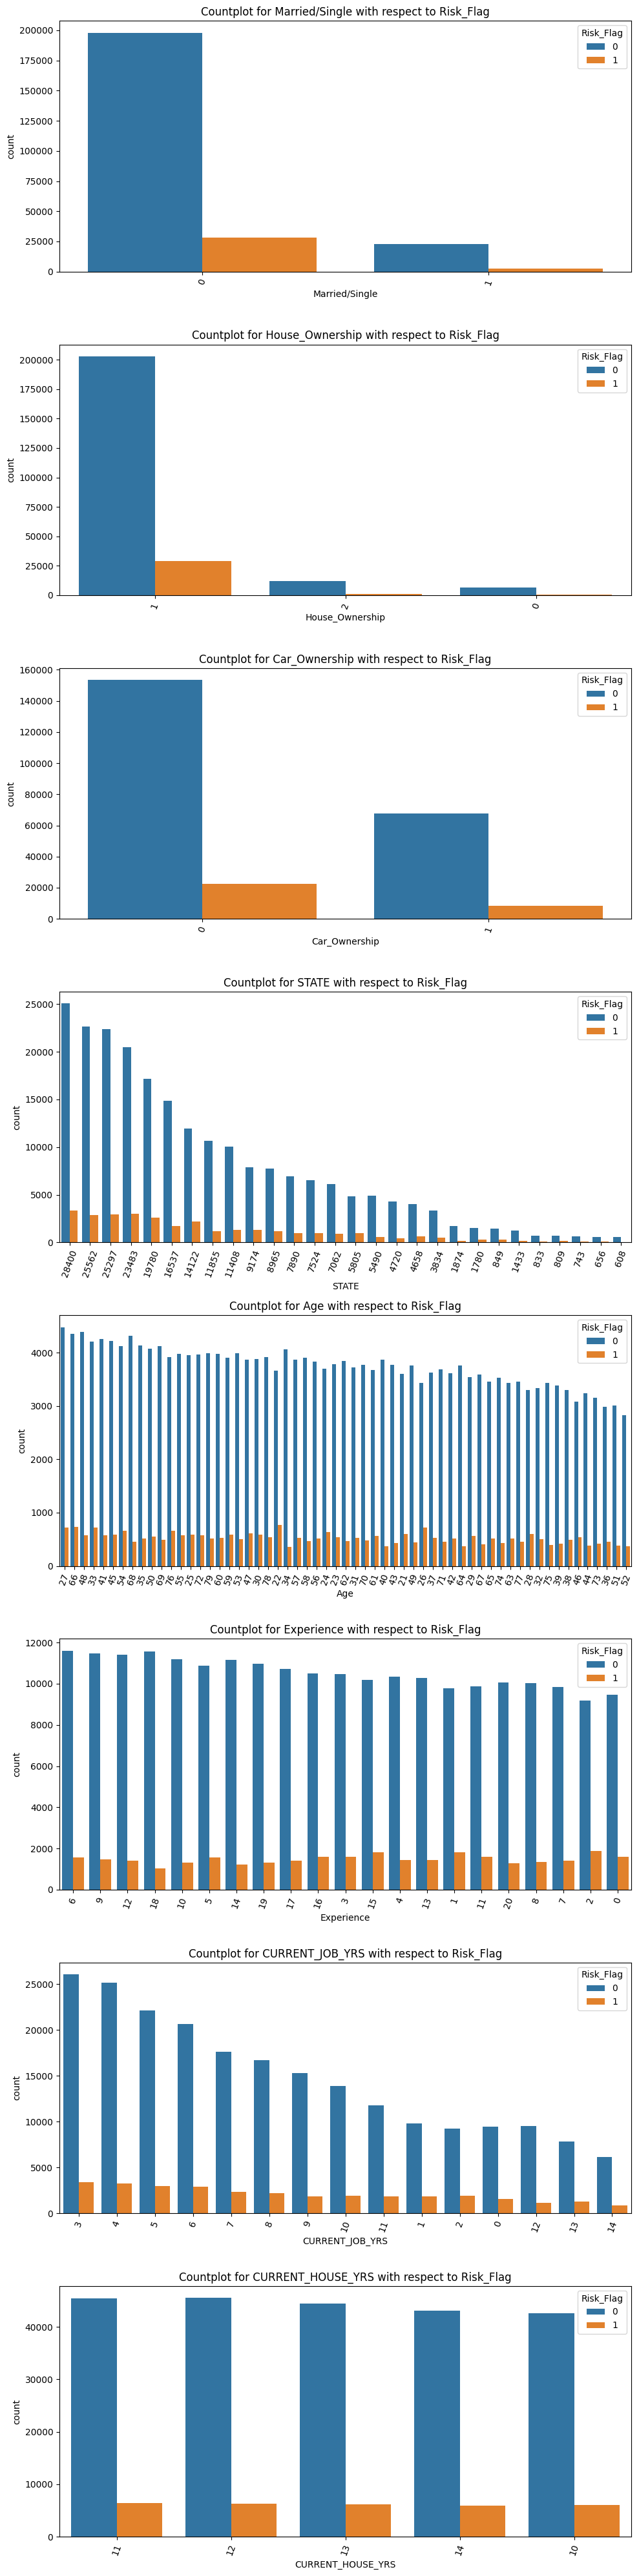

In [179]:
plt.figure(figsize=(10, 40))
for i, cols in enumerate(cat_cols):
    plt.subplot(8, 1, i+1)
    sns.countplot(data=eda_df, x=cols, hue='Risk_Flag', order=eda_df[cols].value_counts().index)
    plt.xticks(rotation=70)
    plt.title(f'Countplot for {cols} with respect to Risk_Flag')
        

plt.tight_layout()
plt.show()

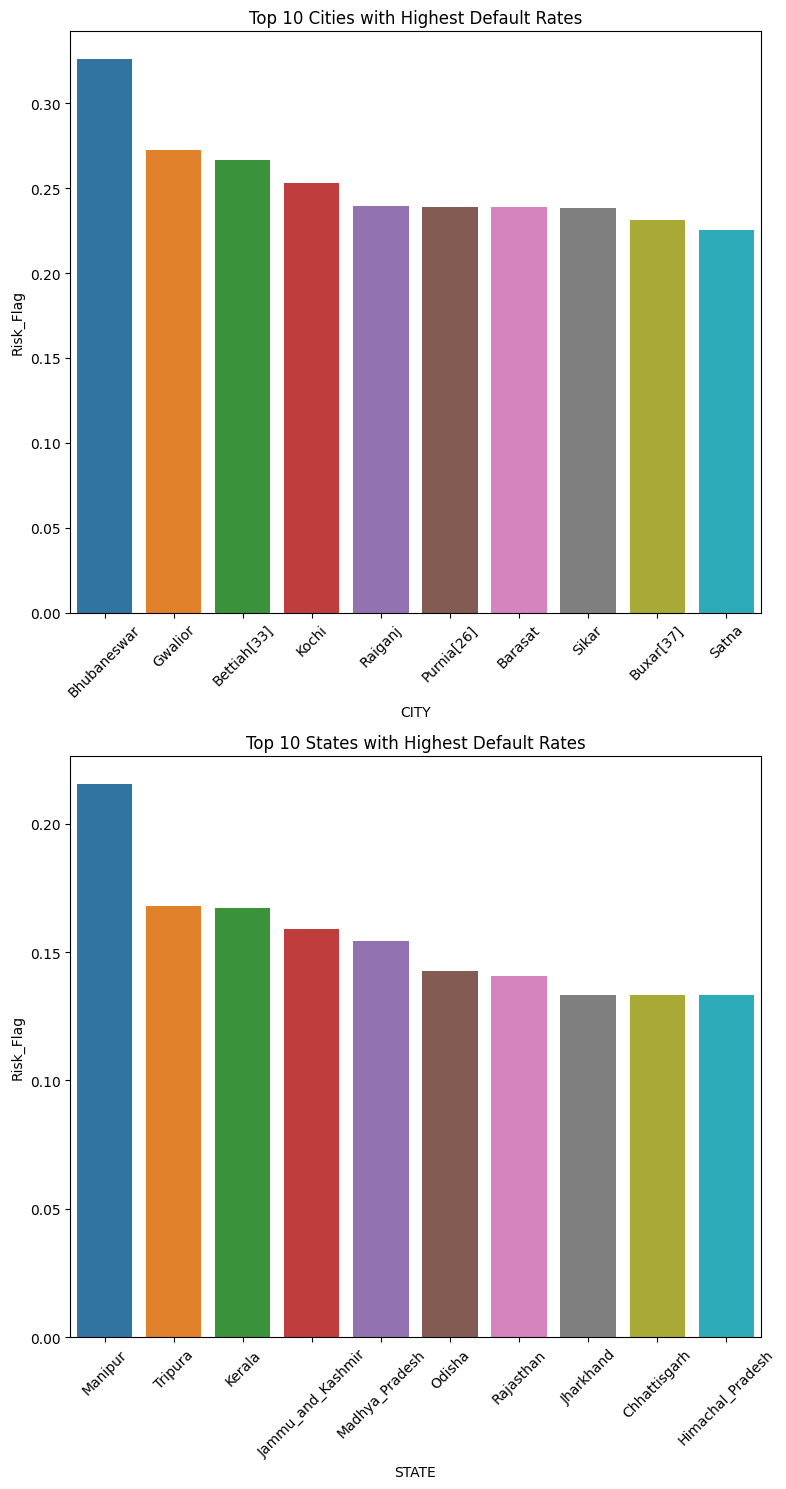

In [20]:
plt.figure(figsize=(8, 15))
default_rates_by_city = eda_df.groupby('CITY')['Risk_Flag'].mean()
default_rates_by_state = eda_df.groupby('STATE')['Risk_Flag'].mean()

top_10_high_default_cities = default_rates_by_city.sort_values(ascending=False).head(10).index
top_10_high_default_states = default_rates_by_state.sort_values(ascending=False).head(10).index

plt.subplot(2, 1, 1)
sns.barplot(x=top_10_high_default_cities, y=default_rates_by_city[top_10_high_default_cities])
plt.title("Top 10 Cities with Highest Default Rates")
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(x=top_10_high_default_states, y=default_rates_by_state[top_10_high_default_states])
plt.title("Top 10 States with Highest Default Rates")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

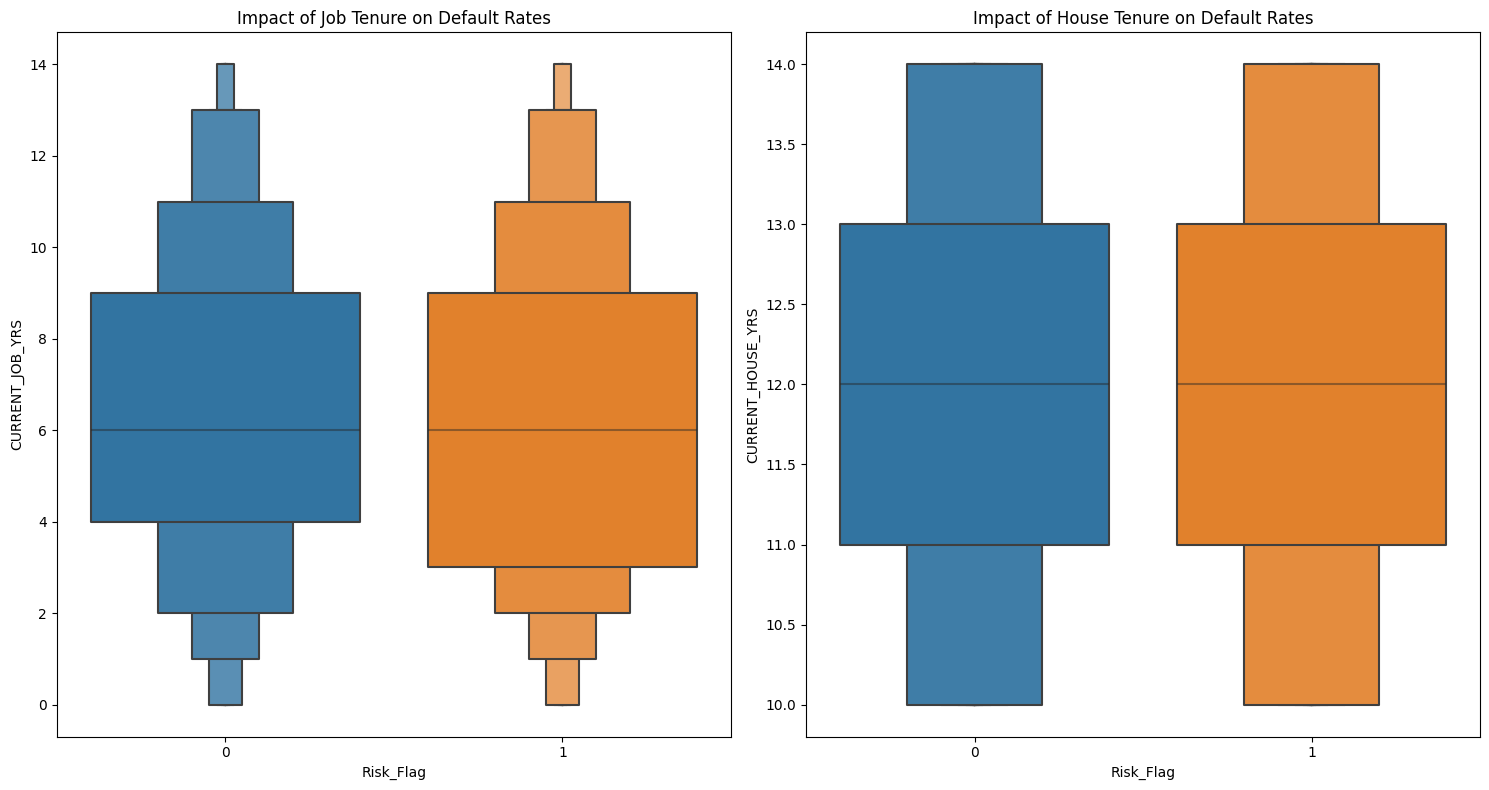

In [21]:

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.boxenplot(x='Risk_Flag', y='CURRENT_JOB_YRS', data=eda_df)
plt.title('Impact of Job Tenure on Default Rates')

plt.subplot(1, 2, 2)
sns.boxenplot(x='Risk_Flag', y='CURRENT_HOUSE_YRS', data=eda_df)
plt.title('Impact of House Tenure on Default Rates')

plt.tight_layout()
plt.show()


<AxesSubplot: xlabel='Income', ylabel='Density'>

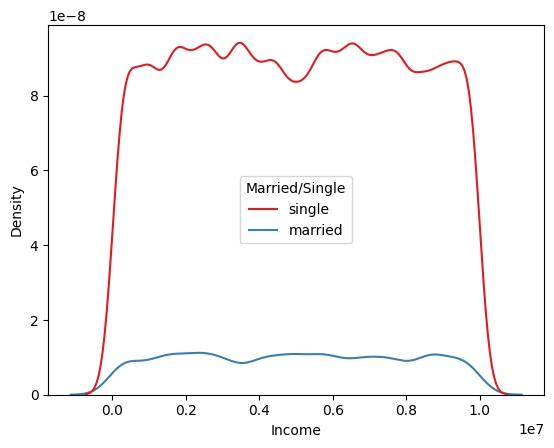

In [22]:
sns.kdeplot(data=eda_df, x='Income', hue="Married/Single", palette="Set1")

### Data Analysis Conclusions 
The years and experience in a job are heavily reliant on the **Income**

### <b>3.3 <span style='color:#16C2D5'>|</span> Multivariate analysis</b>

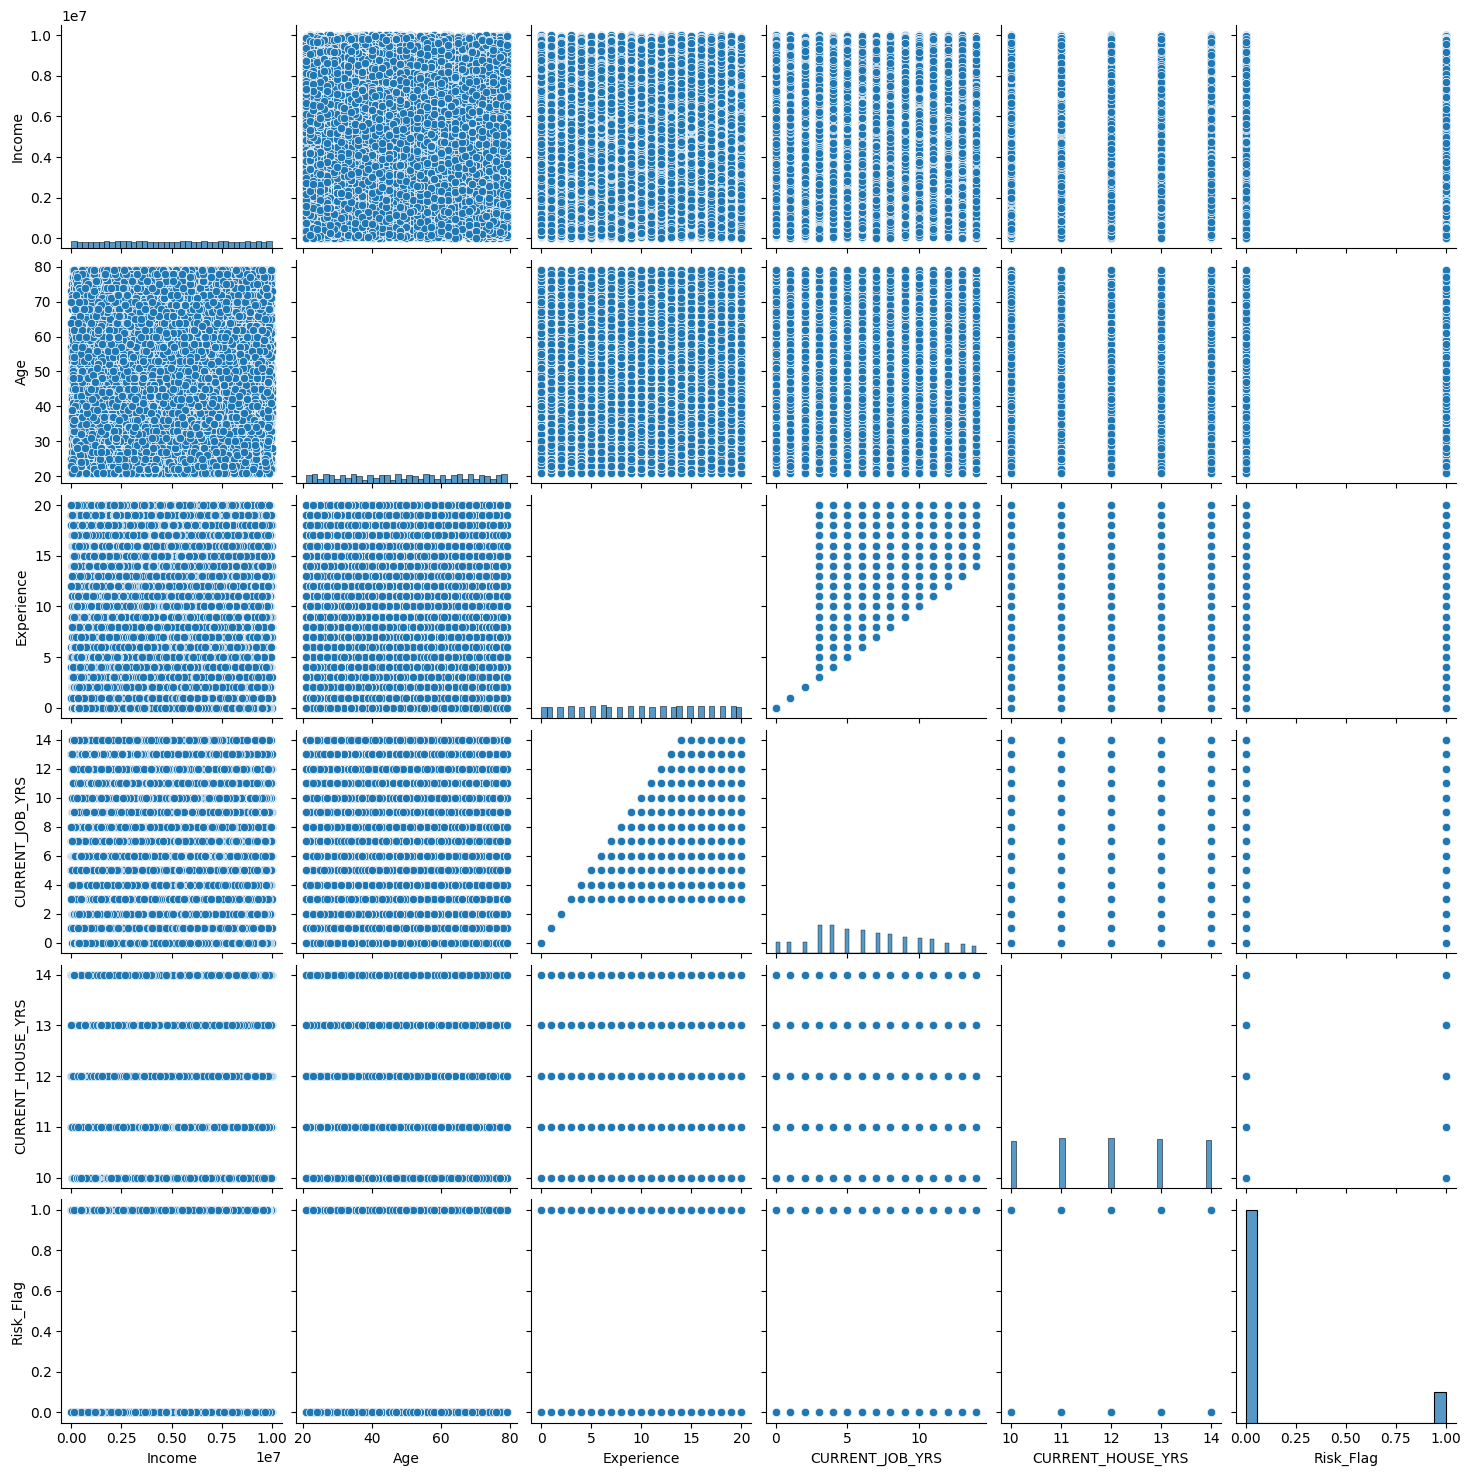

In [23]:
sample_df = eda_df.sample(frac=0.2)
sns.pairplot(sample_df)

### <b><span style='color:#16C2D5'>|</span>Cardinality Check
Cardinality occurs when there is a high number of categorical variables which may not be suitbaly encoded with the OneHotEncorder due to memory issues. This step is necessary to help us know which variable has the highest number of unique features. This will guide us on what to type of encoding to use. </b>

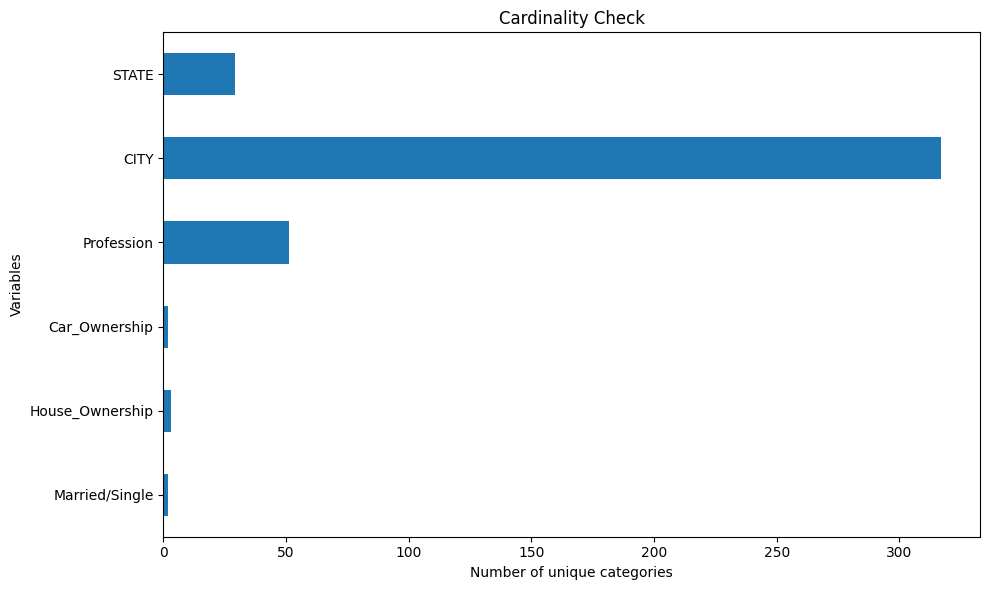

In [24]:
object_cols = eda_df.select_dtypes(include="object")

object_cols.nunique().plot.barh(figsize=(10,6))
plt.xlabel("Number of unique categories")
plt.ylabel("Variables")
plt.title("Cardinality Check")
plt.tight_layout()
plt.show()

The **CITY** column has very high cardinality with over 300 categories. It is followed by **STATE** and **Profession** columns. We are going to encode these unique values whith their corresponding frequencies.

In [25]:
def frequency(df, columns):
    for column in columns:
        frequencies = df[column].value_counts()
        df[column] = df[column].map(frequencies)
    return df

freq = ['CITY', 'STATE', 'Profession']
eda_df = frequency(eda_df, freq)

In [26]:

married = {'single': 0, 'married': 1}
house = {'rented': 1, 'owned': 2, 'norent_noown': 0 }
car = {'no':0, 'yes': 1}

eda_df['Married/Single'] = eda_df['Married/Single'].replace(married).astype(int)
eda_df['House_Ownership'] = eda_df['House_Ownership'].replace(house).astype(int)
eda_df['Car_Ownership'] = eda_df['Car_Ownership'].replace(car).astype(int)


In [27]:
eda_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,1,0,5217,798,14122,3,13,0
1,7574516,40,10,0,1,0,5053,849,25562,9,13,0
2,3991815,66,4,1,1,0,5195,688,5805,4,10,0
3,6256451,41,2,0,1,1,5053,607,4658,2,12,1
4,5768871,47,11,0,1,0,4413,809,16537,3,14,1


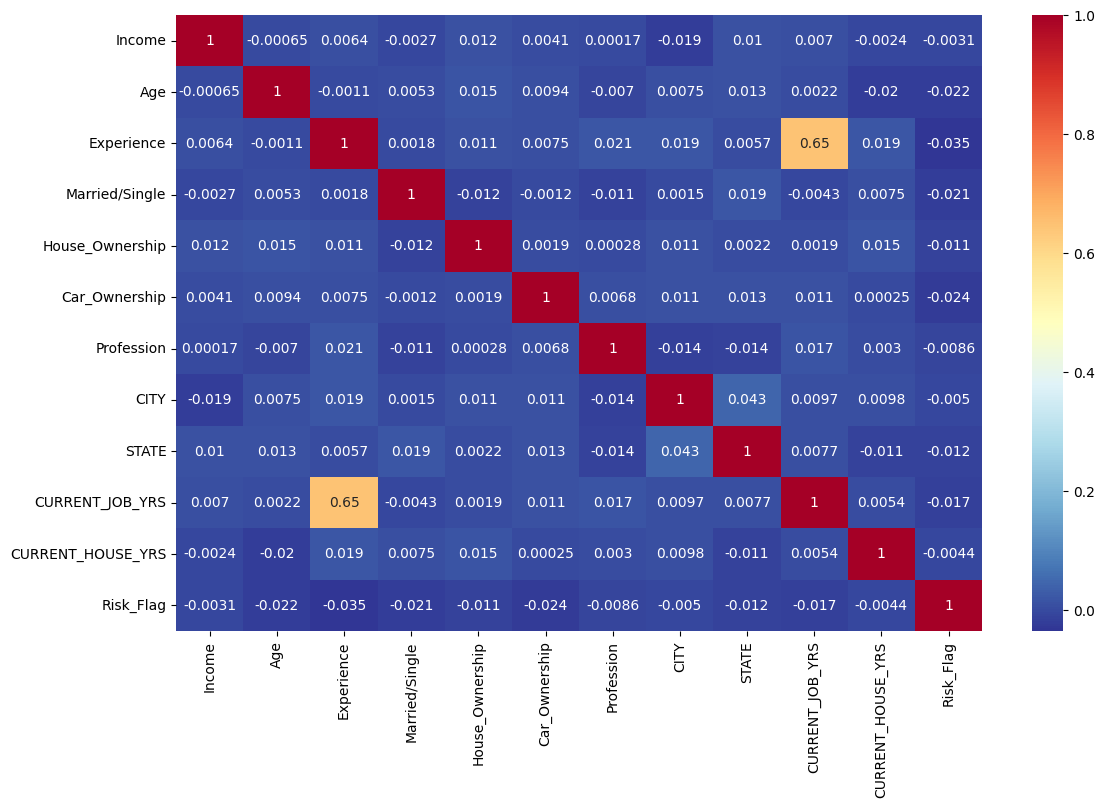

In [28]:
plt.figure(figsize=(13,8))
sns.heatmap(eda_df.corr(), cmap="RdYlBu_r", annot=True)
plt.show()

### <b>3.3 <span style='color:#16C2D5'>|</span> Data analysis observations</b>

The top most high income earners cities are **Manipur, Cghattisgarh and Kerala.**

The top most cities with high default rates are:**Gwalior, Bhubaneswar and Bettiah**

The top most states with high default rates are: **Manipur, Tripura and Kerala**

The **House and job tenures** do not directly influence the default rates.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 4. Modelling</span></b> </div>

### <b>4.1 <span style='color:#16C2D5'>|</span> Baseline Model</b> 

We begin with a baseline logistic regression model with no normalization or standardization. **Normalization** or **Feature Scaling** of data ensures all prediction features are all in a similar range to ensure **each feature has an equal impact on the model's performance.** Working with unstandardized data means features with a higher scale are given more weight than features on a lower scale. This results to sub-optimal models with poor predictions and misleading conclusions.

In [30]:
# Baseline model
X = eda_df.drop(columns=['Risk_Flag'], axis=1)
y = eda_df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 20)

lr = LogisticRegression(class_weight='balanced')
xg = XGBClassifier()
bg = BaggingClassifier(base_estimator=CatBoostClassifier())
dt = DecisionTreeClassifier(class_weight="balanced")
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

acc = accuracy_score(y_test, y_preds)
cr = classification_report(y_test, y_preds)
print(acc)
print(cr)

0.6526388888888889
              precision    recall  f1-score   support

           0       0.88      0.70      0.78     44201
           1       0.13      0.32      0.18      6199

    accuracy                           0.65     50400
   macro avg       0.50      0.51      0.48     50400
weighted avg       0.79      0.65      0.71     50400



The baseline model has a poor recall as well as f1 score for the minority class. The model is heavily biased towards the majority class with a higher weight. To solve the issue of class imbalance, it is therefore necessary to implement the idea of oversampling the minority class to ensure an almost balanced class distribution.

### <b>4.2 <span style='color:#16C2D5'>|</span> Pipeline Model</b> 
Data leakage occurs at times during the preprocessing and feature engineering stages. It is the process where the train and test data are leaked to the model before-hand. This problem makes the model generate very high scores during the testing phase and very poor scores during the production stages. To counter data leakage and ensure our models make it successfully to the production phase with more accurate results, we will use pipelines. 

Pipelines prevent data leakage and also automate the whole process of modelling. As Data Scientists, we will only be concerned with Data Analysis and improving the model's score.

The **CURRENT_JOB_YRS** column and the **Experience** column had very high correlation. As such, we will drop one of them to avoid **Multicollinearity**. Multicollinearity may affect the model score as well as performance. We may end up extracting wrong information from the model incase there are features with high collinearity between them. 

These columns have high collinearity because as the experience increases so does the cureent job years and vice versa.

In [31]:
modelling_df = original_df.copy()
modelling_df.drop(columns=['CURRENT_JOB_YRS'], axis=1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,10,0


Pipelines have automated preprocessing stages where data fed goes through each stage which is basically a fit transform until the final pipe which only fits. The steps for the pipeline include:
*  The first step is the most essential. Splitting the data into train and validation sets and using the **Stratify** to maintain the value counts of the target variable in both splits. 
*  Encoding the high cardinality variables with a **CountFrequencyEncorder** then **OneHotEncode** the categorical variables with low cardinality.
*  Apply **SMOTE** to handle class imbalance issues.
*  Standardize the data using the **MinMaxScaler** to ensure all variables contribute equally to the overall score.
*  Select the top 5 features with high correlation to the target to be used in the prediction process.
*  Initialize our first model which is the **BaggingClassifier**. It is an ensemble method that handles class imbalance pretty well especially when usin the **Logist Regression** as our baseline model.

In [32]:
# Split the data into train and validation set. 
X = modelling_df.drop(columns=['Risk_Flag'], axis=1)
y = modelling_df['Risk_Flag']

X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.25, random_state=20, stratify=y)


In [52]:
## Encoding categorical variables 
count_encs = ['Profession','CITY','STATE']
pipe1 = make_column_transformer((CountFrequencyEncoder(encoding_method="count", variables=count_encs),count_encs),
                                (OneHotEncoder(), slice(3,6)),
                                remainder="passthrough")
                                

In [92]:
pipe2 = SMOTE(sampling_strategy="minority")

In [93]:
pipe3 = make_column_transformer((MinMaxScaler(), slice(0, 10)),
                                remainder="passthrough")

In [172]:
pipe4 = SelectKBest(score_func=chi2, k=7)

In [95]:
# Ensemble model that deals well with the clas imbalance.
pipe5 = BaggingClassifier(base_estimator=LogisticRegression())

In [105]:
# Bagging classifier pipeline.
pipe_bagg = make_pipeline(pipe1,pipe2, pipe3, pipe4, pipe5)

In [106]:
pipe_bagg.fit(X_train1, y_train1)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('countfrequencyencoder',
                                                  CountFrequencyEncoder(variables=['Profession',
                                                                                   'CITY',
                                                                                   'STATE']),
                                                  ['Profession', 'CITY',
                                                   'STATE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  slice(3, 6, None))])),
                ('smote', SMOTE(sampling_strategy='minority')),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x000001C62594B2E0>)),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=LogisticRegression()))])

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Model 2</span></b> </div>


We go ahead and use the already defined pipeline steps to create anothe model using the **RandomForestClassifier**

Random Forests are not sensitive to scales and therefore no need to use pipe 3 which involves the use of the **MinMaxScaler**.

In [108]:
pipe_forr = RandomForestClassifier(class_weight='balanced')

pipe_forr_final = make_pipeline(pipe1,pipe2,pipe4, pipe_forr)

In [109]:
pipe_forr_final.fit(X_train1, y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('countfrequencyencoder',
                                                  CountFrequencyEncoder(variables=['Profession',
                                                                                   'CITY',
                                                                                   'STATE']),
                                                  ['Profession', 'CITY',
                                                   'STATE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  slice(3, 6, None))])),
                ('smote', SMOTE(sampling_strategy='minority')),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x000001C62594B2E0>)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Model 3</span></b> </div>


Create a third model using the boosting algorithms. This boosting algorithm is very good on large datasets as it optimizes the learning process with accurate scores and does it within a short period of time. Our dataset is pretty large and therefore the need for a boosting algorithm.


We use the boosting algorithm **XGBOOST** and include all the initial pipeline steps.

In [110]:
pipe_xgb = XGBClassifier()

pipe_xgb_fin = make_pipeline(pipe1, pipe2, pipe3, pipe4, pipe_xgb)

In [111]:
pipe_xgb_fin.fit(X_train1, y_train1)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('countfrequencyencoder',
                                                  CountFrequencyEncoder(variables=['Profession',
                                                                                   'CITY',
                                                                                   'STATE']),
                                                  ['Profession', 'CITY',
                                                   'STATE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  slice(3, 6, None))])),
                ('smote', SMOTE(sampling_strategy='minority')),
                ('columntransformer-2',
                 ColumnTransfor...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Modell 4</span></b> </div>


After testing out the training process with the **XG Boost** model, we then test out the training process with the **CatBoostClassifier** which is usually optimized for classification problems. It works even best without encoding variables. We will however flow using the pipeline steps already created and defined.

In [114]:
pipe_cat = CatBoostClassifier()

pipe_cat_fin = make_pipeline(pipe1, pipe2, pipe3, pipe4, pipe_cat)

In [115]:
pipe_cat_fin.fit(X_train1, y_train1)

Learning rate set to 0.122796
0:	learn: 0.6848164	total: 289ms	remaining: 4m 48s
1:	learn: 0.6793651	total: 441ms	remaining: 3m 39s
2:	learn: 0.6772016	total: 591ms	remaining: 3m 16s
3:	learn: 0.6751874	total: 699ms	remaining: 2m 53s
4:	learn: 0.6732130	total: 809ms	remaining: 2m 40s
5:	learn: 0.6685891	total: 934ms	remaining: 2m 34s
6:	learn: 0.6634817	total: 1.04s	remaining: 2m 27s
7:	learn: 0.6621842	total: 1.14s	remaining: 2m 21s
8:	learn: 0.6589856	total: 1.22s	remaining: 2m 14s
9:	learn: 0.6575461	total: 1.32s	remaining: 2m 10s
10:	learn: 0.6544401	total: 1.4s	remaining: 2m 5s
11:	learn: 0.6513573	total: 1.48s	remaining: 2m 1s
12:	learn: 0.6503294	total: 1.55s	remaining: 1m 57s
13:	learn: 0.6487800	total: 1.65s	remaining: 1m 56s
14:	learn: 0.6477428	total: 1.74s	remaining: 1m 54s
15:	learn: 0.6467363	total: 1.83s	remaining: 1m 52s
16:	learn: 0.6452035	total: 1.91s	remaining: 1m 50s
17:	learn: 0.6423391	total: 1.98s	remaining: 1m 47s
18:	learn: 0.6411353	total: 2.06s	remaining: 1m

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('countfrequencyencoder',
                                                  CountFrequencyEncoder(variables=['Profession',
                                                                                   'CITY',
                                                                                   'STATE']),
                                                  ['Profession', 'CITY',
                                                   'STATE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  slice(3, 6, None))])),
                ('smote', SMOTE(sampling_strategy='minority')),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x000001C62594B2E0>)),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000001C638CF5090>)])

### Finding the best model
Because we have multiple models an need to choose the one with the best accuracy score, we therefore use **Cross Validation** with five folds to find the model with the best accuracy which is necessary and important to be presented to our bank and microfinance stakeholders. 

In [118]:

pipes = [pipe_bagg, pipe_forr_final, pipe_cat_fin, pipe_xgb_fin]

model_names = []
mean_scores = []


for model in pipes:
    scores = cross_val_score(model, X_train1, y_train1, cv=5, scoring='accuracy')
    
    model_names.append(model)
    mean_scores.append(scores.mean())


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-package

Learning rate set to 0.111636
0:	learn: 0.6854295	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.6807892	total: 142ms	remaining: 1m 10s
2:	learn: 0.6776211	total: 219ms	remaining: 1m 12s
3:	learn: 0.6733289	total: 278ms	remaining: 1m 9s
4:	learn: 0.6711450	total: 334ms	remaining: 1m 6s
5:	learn: 0.6656762	total: 390ms	remaining: 1m 4s
6:	learn: 0.6645776	total: 450ms	remaining: 1m 3s
7:	learn: 0.6623968	total: 505ms	remaining: 1m 2s
8:	learn: 0.6596807	total: 568ms	remaining: 1m 2s
9:	learn: 0.6583251	total: 629ms	remaining: 1m 2s
10:	learn: 0.6571690	total: 692ms	remaining: 1m 2s
11:	learn: 0.6514370	total: 751ms	remaining: 1m 1s
12:	learn: 0.6498070	total: 810ms	remaining: 1m 1s
13:	learn: 0.6478998	total: 874ms	remaining: 1m 1s
14:	learn: 0.6468476	total: 939ms	remaining: 1m 1s
15:	learn: 0.6448935	total: 1.01s	remaining: 1m 2s
16:	learn: 0.6434711	total: 1.08s	remaining: 1m 2s
17:	learn: 0.6425776	total: 1.14s	remaining: 1m 2s
18:	learn: 0.6394571	total: 1.2s	remaining: 1m 2s
19:	learn

### Check for overfitting

In [122]:
best_acc = 0
best_pipe = " "

pipe_dict = {0: "BaggingClassifier", 1: "RandomForest", 2: "XGBoost", 3: "CatBoost"}

for pipe in pipes:
    pipe.fit(X_train1, y_train1)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Learning rate set to 0.122796
0:	learn: 0.6846702	total: 284ms	remaining: 4m 43s
1:	learn: 0.6782216	total: 396ms	remaining: 3m 17s
2:	learn: 0.6757924	total: 510ms	remaining: 2m 49s
3:	learn: 0.6725888	total: 676ms	remaining: 2m 48s
4:	learn: 0.6707280	total: 886ms	remaining: 2m 56s
5:	learn: 0.6654812	total: 1.01s	remaining: 2m 47s
6:	learn: 0.6641284	total: 1.13s	remaining: 2m 39s
7:	learn: 0.6579939	total: 1.28s	remaining: 2m 38s
8:	learn: 0.6540207	total: 1.45s	remaining: 2m 39s
9:	learn: 0.6523266	total: 1.56s	remaining: 2m 34s
10:	learn: 0.6500173	total: 1.69s	remaining: 2m 31s
11:	learn: 0.6481328	total: 1.85s	remaining: 2m 32s
12:	learn: 0.6449796	total: 1.99s	remaining: 2m 31s
13:	learn: 0.6432117	total: 2.11s	remaining: 2m 28s
14:	learn: 0.6422515	total: 2.24s	remaining: 2m 27s
15:	learn: 0.6412155	total: 2.38s	remaining: 2m 26s
16:	learn: 0.6402688	total: 2.5s	remaining: 2m 24s
17:	learn: 0.6390837	total: 2.93s	remaining: 2m 39s
18:	learn: 0.6345260	total: 3.3s	remaining: 2

In [127]:
train_scores = []
for i, model in enumerate(pipes):
    print(f"{pipe_dict[i]}", model.score(X_val, y_val))
    print(f"Train accuracy {pipe_dict[i]}", model.score(X_train1, y_train1))
    train_score = model.score(X_train1, y_train1)
    train_scores.append(train_score)
    model_names.append(pipe_dict[i])

BaggingClassifier 0.877
Train accuracy BaggingClassifier 0.877
RandomForest 0.877
Train accuracy RandomForest 0.876994708994709
XGBoost 0.8708571428571429
Train accuracy XGBoost 0.8750370370370371
CatBoost 0.8451428571428572
Train accuracy CatBoost 0.8514179894179894


There is no overfitting beacuse te scores for both the train and test sets seem to be almost the same. This shows how beneficial it is to use pipelines to automate the whole modelling process.

In [132]:
train_scores, model_names

([0.877, 0.876994708994709, 0.8750370370370371, 0.8514179894179894],
 [Pipeline(steps=[('columntransformer-1',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('countfrequencyencoder',
                                                    CountFrequencyEncoder(variables=['Profession',
                                                                                     'CITY',
                                                                                     'STATE']),
                                                    ['Profession', 'CITY',
                                                     'STATE']),
                                                   ('onehotencoder',
                                                    OneHotEncoder(),
                                                    slice(3, 6, None))])),
                  ('smote', SMOTE(sampling_strategy='minority')),
                  ('columntransformer-2',
  

In [141]:
y_preds2 = pipe_xgb_fin.predict(X_val)

acc = accuracy_score(y_val, y_preds2)
cr = classification_report(y_val, y_preds2)
print(acc)
print(cr)

0.8451428571428572
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     55251
           1       0.42      0.72      0.53      7749

    accuracy                           0.85     63000
   macro avg       0.69      0.79      0.72     63000
weighted avg       0.89      0.85      0.86     63000



In [140]:
y_preds2 = pipe_cat_fin.predict(X_val)

acc = accuracy_score(y_val, y_preds2)
cr = classification_report(y_val, y_preds2)
print(acc)
print(cr)

0.8708571428571429
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     55251
           1       0.48      0.77      0.59      7749

    accuracy                           0.87     63000
   macro avg       0.72      0.83      0.76     63000
weighted avg       0.91      0.87      0.88     63000



The **Catboost model has a better Precision, recall and f1-Score for the minority class**. It performs better than the all the other models. It is oftenly optimized for categorical problems.

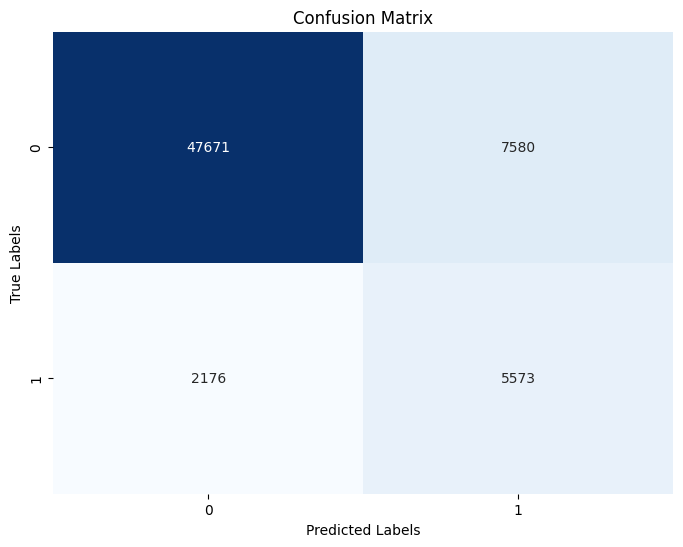

In [146]:
cm = confusion_matrix(y_val, y_preds2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The values of **False negative(2176)** are the worst case scenario beacuse a person who had defaulted may be predicted as a non-defaulter. This will mean the institution will miss out on hitting their targets as well as recovering their loans. The **Loan Recovery** department will have a hard time in meeting their daily goals. 

We seek to optimize this model to ensure a reduction in the value of **False negatives**.

In [167]:
pipe_cat_new = CatBoostClassifier( loss_function="Logloss", eval_metric="AUC")

pipe_cat_fin2 = make_pipeline(pipe1, pipe2, pipe3, pipe4, pipe_cat_new)

pipe_cat_fin2.fit(X_train1, y_train1)

y_preds3 = pipe_cat_fin2.predict(X_val)

acc2 = accuracy_score(y_val, y_preds3)
cr2 = classification_report(y_val, y_preds3)
print(acc)
print(cr)

Learning rate set to 0.122796
0:	total: 82ms	remaining: 1m 21s
1:	total: 173ms	remaining: 1m 26s
2:	total: 266ms	remaining: 1m 28s
3:	total: 337ms	remaining: 1m 23s
4:	total: 408ms	remaining: 1m 21s
5:	total: 481ms	remaining: 1m 19s
6:	total: 547ms	remaining: 1m 17s
7:	total: 616ms	remaining: 1m 16s
8:	total: 683ms	remaining: 1m 15s
9:	total: 759ms	remaining: 1m 15s
10:	total: 825ms	remaining: 1m 14s
11:	total: 892ms	remaining: 1m 13s
12:	total: 958ms	remaining: 1m 12s
13:	total: 1.03s	remaining: 1m 12s
14:	total: 1.1s	remaining: 1m 12s
15:	total: 1.17s	remaining: 1m 11s
16:	total: 1.23s	remaining: 1m 11s
17:	total: 1.31s	remaining: 1m 11s
18:	total: 1.38s	remaining: 1m 11s
19:	total: 1.45s	remaining: 1m 10s
20:	total: 1.51s	remaining: 1m 10s
21:	total: 1.59s	remaining: 1m 10s
22:	total: 1.65s	remaining: 1m 10s
23:	total: 1.72s	remaining: 1m 9s
24:	total: 1.81s	remaining: 1m 10s
25:	total: 1.9s	remaining: 1m 11s
26:	total: 1.97s	remaining: 1m 11s
27:	total: 2.04s	remaining: 1m 10s
28:	

[[48895  6356]
 [ 1859  5890]]


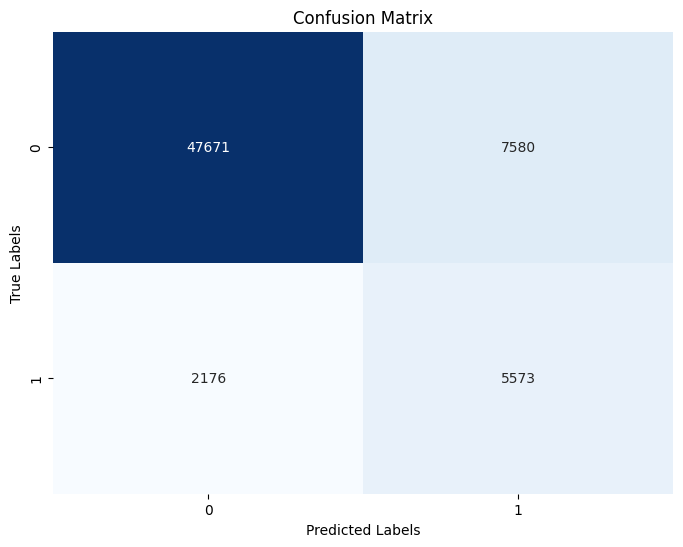

In [169]:
cm2 = confusion_matrix(y_val, y_preds3)
print(cm2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Since there was no change in the score, we seek to try out another form of oversampling which is the **RandomOversampler**

In [170]:
pipe_smote = RandomOverSampler(sampling_strategy="minority")

pipe_cat_fin3 = make_pipeline(pipe1, pipe_smote, pipe3, pipe4, pipe_cat_new)

pipe_cat_fin3.fit(X_train1, y_train1)

y_preds4 = pipe_cat_fin3.predict(X_val)

acc2 = accuracy_score(y_val, y_preds4)
cr2 = classification_report(y_val, y_preds4)
print(acc)
print(cr)

Learning rate set to 0.122796
0:	total: 74.1ms	remaining: 1m 13s
1:	total: 139ms	remaining: 1m 9s
2:	total: 222ms	remaining: 1m 13s
3:	total: 338ms	remaining: 1m 24s
4:	total: 411ms	remaining: 1m 21s
5:	total: 521ms	remaining: 1m 26s
6:	total: 631ms	remaining: 1m 29s
7:	total: 705ms	remaining: 1m 27s
8:	total: 797ms	remaining: 1m 27s
9:	total: 921ms	remaining: 1m 31s
10:	total: 1s	remaining: 1m 29s
11:	total: 1.11s	remaining: 1m 31s
12:	total: 1.2s	remaining: 1m 30s
13:	total: 1.28s	remaining: 1m 29s
14:	total: 1.37s	remaining: 1m 30s
15:	total: 1.48s	remaining: 1m 31s
16:	total: 1.55s	remaining: 1m 29s
17:	total: 1.64s	remaining: 1m 29s
18:	total: 1.76s	remaining: 1m 30s
19:	total: 1.84s	remaining: 1m 30s
20:	total: 1.95s	remaining: 1m 30s
21:	total: 2.04s	remaining: 1m 30s
22:	total: 2.12s	remaining: 1m 29s
23:	total: 2.2s	remaining: 1m 29s
24:	total: 2.31s	remaining: 1m 30s
25:	total: 2.38s	remaining: 1m 29s
26:	total: 2.46s	remaining: 1m 28s
27:	total: 2.57s	remaining: 1m 29s
28:	t

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     55251
           1       0.41      0.81      0.54      7749

    accuracy                           0.83     63000
   macro avg       0.69      0.82      0.72     63000
weighted avg       0.90      0.83      0.85     63000



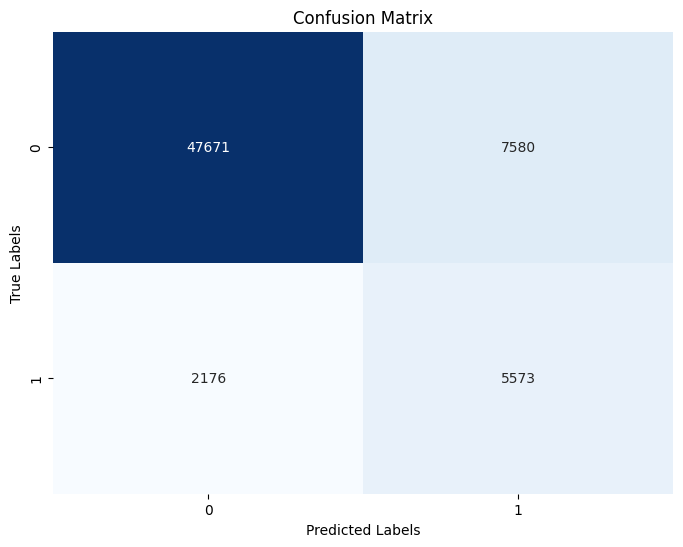

In [171]:
cr3 = classification_report(y_val, y_preds4)
print(cr3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The score of the model does not change but the **Recall** of the minority class has greatly improved from **78%** to **83**

We seek to change the number of features used from 5 to 7 and observe if the false positives reduces.

Learning rate set to 0.122796
0:	total: 87.9ms	remaining: 1m 27s
1:	total: 155ms	remaining: 1m 17s
2:	total: 250ms	remaining: 1m 22s
3:	total: 339ms	remaining: 1m 24s
4:	total: 414ms	remaining: 1m 22s
5:	total: 501ms	remaining: 1m 22s
6:	total: 606ms	remaining: 1m 25s
7:	total: 683ms	remaining: 1m 24s
8:	total: 771ms	remaining: 1m 24s
9:	total: 884ms	remaining: 1m 27s
10:	total: 983ms	remaining: 1m 28s
11:	total: 1.1s	remaining: 1m 30s
12:	total: 1.17s	remaining: 1m 28s
13:	total: 1.25s	remaining: 1m 27s
14:	total: 1.35s	remaining: 1m 28s
15:	total: 1.42s	remaining: 1m 27s
16:	total: 1.5s	remaining: 1m 26s
17:	total: 1.59s	remaining: 1m 26s
18:	total: 1.68s	remaining: 1m 26s
19:	total: 1.78s	remaining: 1m 27s
20:	total: 1.88s	remaining: 1m 27s
21:	total: 1.95s	remaining: 1m 26s
22:	total: 2.03s	remaining: 1m 26s
23:	total: 2.13s	remaining: 1m 26s
24:	total: 2.2s	remaining: 1m 25s
25:	total: 2.29s	remaining: 1m 25s
26:	total: 2.37s	remaining: 1m 25s
27:	total: 2.44s	remaining: 1m 24s
28

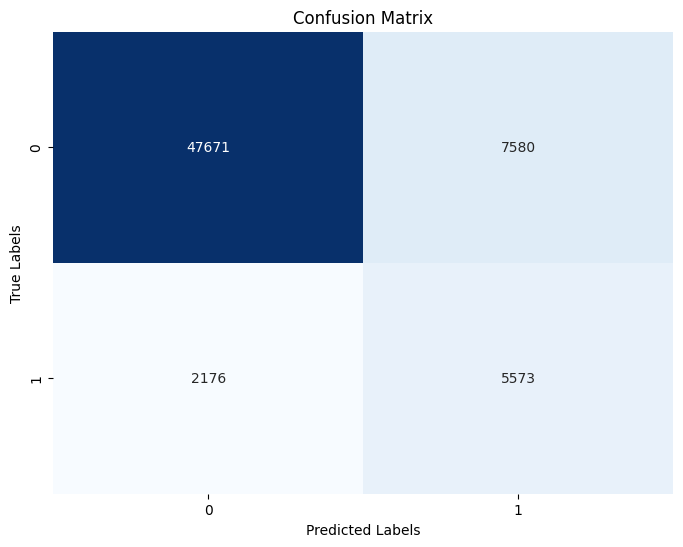

In [173]:
pipe_smote = RandomOverSampler(sampling_strategy="minority")

pipe_cat_fin4 = make_pipeline(pipe1, pipe_smote, pipe3, pipe4, pipe_cat_new)

pipe_cat_fin4.fit(X_train1, y_train1)

y_preds5 = pipe_cat_fin4.predict(X_val)

acc2 = accuracy_score(y_val, y_preds5)
cr2 = classification_report(y_val, y_preds5)
print(acc)
print(cr)

cr4 = classification_report(y_val, y_preds5)
print(cr4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Out of 7749 people, the model correctly predicts 5573 people correctly have loans and their likelihood to default is high. The **False negattives** are bad for business.

Out of 55,251 people, the model correctly predicts about 48,000 people who do not have loans but misclassifies about 7,600 people as though they have loans.

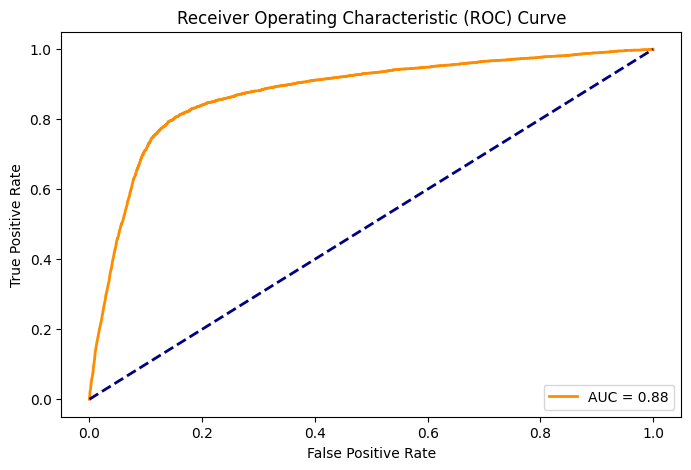

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_probs = pipe_cat_fin4.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### The area Under the curve is 0.88 which is closer to 1. This is generally a good model. 

In [175]:

y_probs = pipe_cat_fin4.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_probs)

desired_fpr = 0.1  # Change this to the desired FPR value
index = np.argmax(fpr >= desired_fpr)

# Get the corresponding threshold
desired_threshold = thresholds[index]

print(f"Threshold at FPR {desired_fpr:.2%}: {desired_threshold:.4f}")


Threshold at FPR 10.00%: 0.6011


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 5. Conclusions</span></b> </div>



1. The modell with the best score is the **Catboost classifier** with an AUC of 0.88. This is our robust model that will help in classifying loan defaulters.
2. The desired threshold to minimize the **False Positive Rate** and have a good **True Positive rate** is 0.6011. A high false negative means that clients will walk away with unpaid loans. This can only be achieved when the **FPR** is low and the **TPR** is high. A high TPR means that all those who have loans are correctly predicted and nothing is left to chance.

   The **Area Under Curve** is greater than 0.5 and is more closer to one. This modle is not just a random model.

3. The top most high income earners cities are **Manipur, Cghattisgarh and Kerala.**

   The top most cities with high default rates are:**Gwalior, Bhubaneswar and Bettiah**
   
   The top most states with high default rates are: **Manipur, Tripura and Kerala**

4. The house tenures and job tenures have no direct impact on the default rates. 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 6. Model Pickling</span></b> </div>



Saving the model for later use is good practise for a Data Scientist and is very good suppose the model needs to be loaded again some other day.

In [178]:
pickle.dump(pipe_cat_fin4 , open('catboost-loan-default-model.pk1' , 'wb'))